## Nash Social welfare

In [1]:
import numpy as np
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_objective_func(mu_matrix):

    def objective_func(p):
        p = np.asarray(p)
        expected_utilities = np.dot(mu_matrix, p)
        nsw = np.prod(expected_utilities)
        return -1 * nsw
    
    return objective_func


def get_optimal_policy(mu_matrix):
    """
    Get the policy from the objective function.
    """

    # Objective function
    objective = get_objective_func(mu_matrix)

    # Constraint 
    def constraint(p):
        return 1 - sum(p)

    # Bounds and constraints
    bounds = [(0, 1)] * mu_matrix.shape[1]
    constraints = [{'type': 'eq', 'fun': constraint}]
    initial_guess = np.ones(mu_matrix.shape[1]) / mu_matrix.shape[1]

    result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

    return result.x

Optimal p1: 0.3333333333333333
Optimal p2: 0.3333333333333333
Optimal p3: 0.3333333333333333


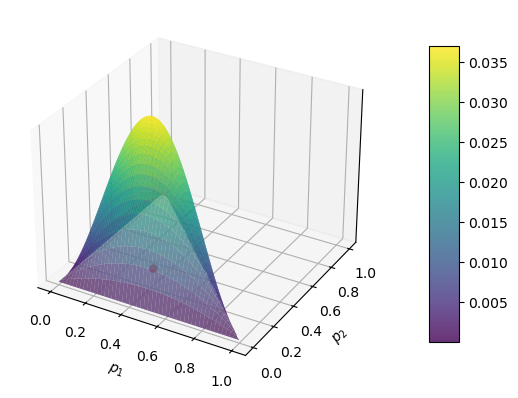

In [3]:
# Define the mu matrix
mu_matrix = np.array([[1, 0, 0],
                       [0, 1, 0],
                       [0, 0, 1]])

objective = get_objective_func(mu_matrix)
# Optimization
optimal_p1, optimal_p2, optimal_p3 = get_optimal_policy(mu_matrix)

print(f"Optimal p1: {optimal_p1}")
print(f"Optimal p2: {optimal_p2}")
print(f"Optimal p3: {optimal_p3}")

# Grid setup
p1_vals = np.linspace(0, 1, 200)
p2_vals = np.linspace(0, 1, 200)
P1, P2 = np.meshgrid(p1_vals, p2_vals)
P3 = 1 - P1 - P2

# Create mask for valid (feasible) region
mask = P3 >= 0

# Compute Z only where the mask is valid
Z = np.full(P1.shape, np.nan)
for i in range(P1.shape[0]):
    for j in range(P1.shape[1]):
        if mask[i, j]:
            Z[i, j] = -1 * objective([P1[i, j], P2[i, j], P3[i, j]])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Objective surface
surf = ax.plot_surface(P1, P2, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Shade feasible region in xy-plane (z=0)
Z_plane = np.zeros_like(P1)
Z_plane[~mask] = np.nan  # Hide infeasible part
ax.plot_surface(P1, P2, Z_plane, color='lightgray', alpha=0.3)

# Plot optimal point
ax.plot([optimal_p1], [optimal_p2], [0], 'ro', markersize=5)

# Labels and display
ax.set_xlabel(r'$p_1$')
ax.set_ylabel(r'$p_2$')
ax.set_zticks([])
ax.set_zticklabels([])
cbar = plt.colorbar(surf, format='%.3f', shrink=0.8, aspect=10, pad=0.1)
cbar.ax.tick_params(labelsize=10)


plt.show()

Optimal p1: 0.5
Optimal p2: 0.49999999999999994
Optimal p3: 0.0


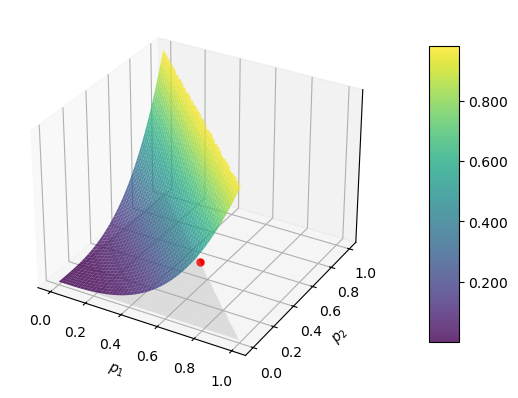

In [4]:
mu_matrix = np.array([[1, 1, 0],
                      [1, 1, 0],
                      [1, 1, 0]])

objective = get_objective_func(mu_matrix)
# Optimization
optimal_p1, optimal_p2, optimal_p3 = get_optimal_policy(mu_matrix)

print(f"Optimal p1: {optimal_p1}")
print(f"Optimal p2: {optimal_p2}")
print(f"Optimal p3: {optimal_p3}")

# Grid setup
p1_vals = np.linspace(0, 1, 200)
p2_vals = np.linspace(0, 1, 200)
P1, P2 = np.meshgrid(p1_vals, p2_vals)
P3 = 1 - P1 - P2

# Create mask for valid (feasible) region
mask = P3 >= 0

# Compute Z only where the mask is valid
Z = np.full(P1.shape, np.nan)
for i in range(P1.shape[0]):
    for j in range(P1.shape[1]):
        if mask[i, j]:
            Z[i, j] = -1 * objective([P1[i, j], P2[i, j], P3[i, j]])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Objective surface
surf = ax.plot_surface(P1, P2, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Shade feasible region in xy-plane (z=0)
Z_plane = np.zeros_like(P1)
Z_plane[~mask] = np.nan  # Hide infeasible part
ax.plot_surface(P1, P2, Z_plane, color='lightgray', alpha=0.3)

# Plot optimal point
ax.plot([optimal_p1], [optimal_p2], [0], 'ro', markersize=5)

# Labels and display
ax.set_xlabel(r'$p_1$')
ax.set_ylabel(r'$p_2$')
ax.set_zticks([])
ax.set_zticklabels([])
cbar = plt.colorbar(surf, format='%.3f', shrink=0.8, aspect=10, pad=0.1)
cbar.ax.tick_params(labelsize=10)


plt.show()


Optimal p1: 0.6666710828660886
Optimal p2: 0.33332891713390217
Optimal p3: 9.135162244711115e-15


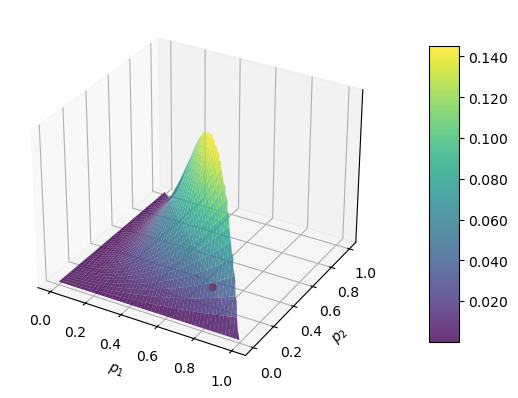

In [5]:
# Define the mu matrix
mu_matrix = np.array([[0, 1, 0],
                       [1, 0, 0],
                       [1, 0, 0]])


objective = get_objective_func(mu_matrix)
# Optimization
optimal_p1, optimal_p2, optimal_p3 = get_optimal_policy(mu_matrix)

print(f"Optimal p1: {optimal_p1}")
print(f"Optimal p2: {optimal_p2}")
print(f"Optimal p3: {optimal_p3}")

# Grid setup
p1_vals = np.linspace(0, 1, 200)
p2_vals = np.linspace(0, 1, 200)
P1, P2 = np.meshgrid(p1_vals, p2_vals)
P3 = 1 - P1 - P2

# Create mask for valid (feasible) region
mask = P3 >= 0

# Compute Z only where the mask is valid
Z = np.full(P1.shape, np.nan)
for i in range(P1.shape[0]):
    for j in range(P1.shape[1]):
        if mask[i, j]:
            Z[i, j] = -1 * objective([P1[i, j], P2[i, j], P3[i, j]])

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Objective surface
surf = ax.plot_surface(P1, P2, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Shade feasible region in xy-plane (z=0)
Z_plane = np.zeros_like(P1)
Z_plane[~mask] = np.nan  # Hide infeasible part
ax.plot_surface(P1, P2, Z_plane, color='lightgray', alpha=0.3)

# Plot optimal point
ax.plot([optimal_p1], [optimal_p2], [0], 'ro', markersize=5)

# Labels and display
ax.set_xlabel(r'$p_1$')
ax.set_ylabel(r'$p_2$')
ax.set_zticks([])
ax.set_zticklabels([])
cbar = plt.colorbar(surf, format='%.3f', shrink=0.8, aspect=10, pad=0.1)
cbar.ax.tick_params(labelsize=10)


plt.show()